In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importing data 
df = pd.read_csv('Weather Data.csv')


In [23]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
df.shape

(8784, 8)

In [5]:
# Display basic statistic of the dataset

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [6]:
# Checking for the missing values in each column
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

There is no any missing values in dataset.

## Exploratory Data Analysis

In [7]:
# Data Exploration 
print("\nNumber of unique values in each colum: ")
df.nunique()


Number of unique values in each colum: 


Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [9]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [10]:
df.Weather.nunique()

50

There are 50 different types of weather conditons.

In [11]:
# Count of each weather conditions
print("\nCount of each weather condition: ")
df.Weather.value_counts()


Count of each weather condition: 


Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [12]:
# show all records where wather condition is 'Clear'

print("\nRecords where weather condition is clear: ")
df[df.Weather=='Clear']


Records where weather condition is clear: 


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


<AxesSubplot:>

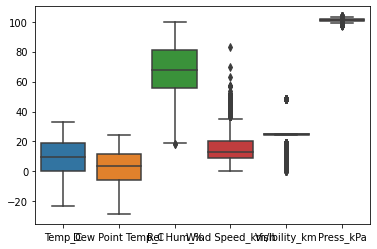

In [6]:
sns.boxplot(df)

<AxesSubplot:>

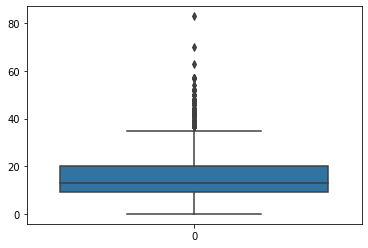

In [7]:
sns.boxplot(df['Wind Speed_km/h'])

In [9]:
q3=df['Wind Speed_km/h'].quantile(0.75)
q3

20.0

In [10]:
q1 = df['Wind Speed_km/h'].quantile(0.25)
q1

9.0

In [11]:
iqr = q3-q1
iqr

11.0

In [12]:
df[df['Wind Speed_km/h']>q3+1.5*iqr]['Wind Speed_km/h'].count()

162

In [14]:
df[df['Wind Speed_km/h']<q1-1.5*iqr]['Wind Speed_km/h'].count()

0

In [15]:
df['Wind Speed_km/h'].describe()

count    8784.000000
mean       14.945469
std         8.688696
min         0.000000
25%         9.000000
50%        13.000000
75%        20.000000
max        83.000000
Name: Wind Speed_km/h, dtype: float64

In [25]:
df['Wind Speed_km/h']=np.where(df['Wind Speed_km/h']>q3,df['Wind Speed_km/h'].quantile(0.80),df['Wind Speed_km/h'])

<AxesSubplot:>

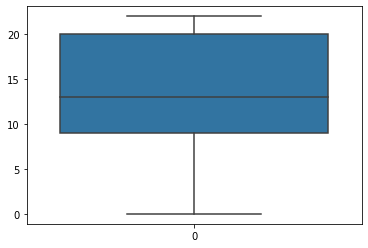

In [26]:
sns.boxplot(df['Wind Speed_km/h'])

<AxesSubplot:>

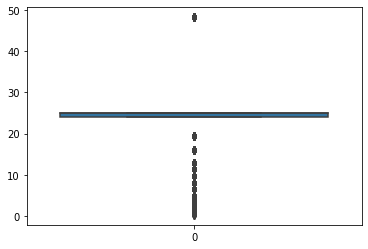

In [27]:
sns.boxplot(df['Visibility_km'])

In [28]:
df['Visibility_km'].describe()

count    8784.000000
mean       27.664447
std        12.622688
min         0.200000
25%        24.100000
50%        25.000000
75%        25.000000
max        48.300000
Name: Visibility_km, dtype: float64

In [29]:
df['Press_kPa'].describe()

count    8784.000000
mean      101.051623
std         0.844005
min        97.520000
25%       100.560000
50%       101.070000
75%       101.590000
max       103.650000
Name: Press_kPa, dtype: float64

<AxesSubplot:>

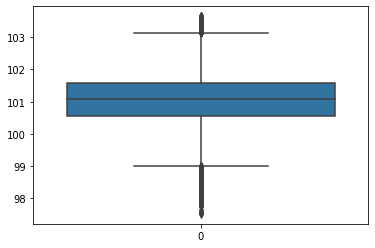

In [30]:
sns.boxplot(df['Press_kPa'])

In [32]:
q3 = df['Press_kPa'].quantile(0.75)
q3

101.59

In [34]:
q1 = df['Press_kPa'].quantile(0.25)
q1

100.56

In [35]:
iqr = q3-q1
iqr

1.0300000000000011

In [36]:
df[df['Press_kPa']>q3+1.5*iqr]['Press_kPa'].count()

89

In [38]:
df[df['Press_kPa']<q1-1.5*iqr]['Press_kPa'].count()

118

In [42]:
df['Press_kPa'] = np.where(df['Press_kPa']>q3,df['Press_kPa'].quantile(0.80),df['Press_kPa'])
df['Press_kPa'] = np.where(df['Press_kPa']<q1,df['Press_kPa'].quantile(0.20),df['Press_kPa'])

<AxesSubplot:>

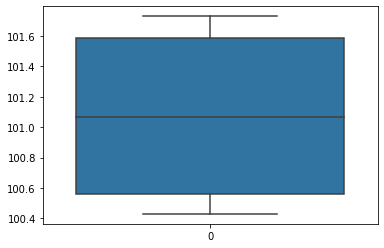

In [43]:
sns.boxplot(df['Press_kPa'])

In [44]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,13.737477,27.664447,101.074777
std,11.687883,10.883072,16.918881,6.467750,12.622688,0.503503
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,100.430000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,22.000000,48.300000,101.730000


<AxesSubplot:>

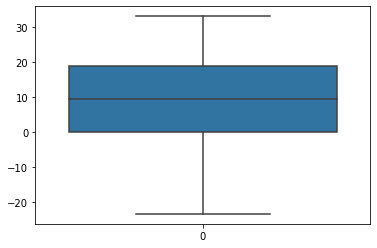

In [45]:
sns.boxplot(df['Temp_C'])

<AxesSubplot:>

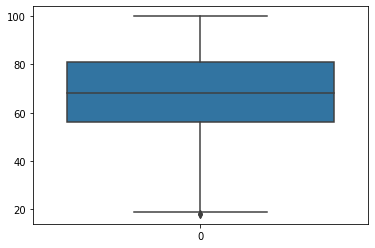

In [46]:
sns.boxplot(df['Rel Hum_%'])